## Customer Segmentation Analysis 

#### Q.  What is Customer Segmentation and why is it important from marketing perspective?

Customer segmentation is the process by which you separate customers up based on their common characteristics – such as demographics or spending behaviors, so we can market to those customers more effectively. It can help a business to better understand its target audience and better implementation of marketing strategies, thereby potentially driving an increase in customer loyalty and other marketing metrics. 

## Import Libraries and Data

In [ ]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

## import the chardet library and use the detect method to find the type of encoding

In [ ]:
import chardet

In [ ]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

## Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing
- Remove Null Values
- Remove Duplicate Values

In [ ]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [ ]:
data.shape

(406829, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [ ]:
filtered_data.shape

(4380, 2)

In [ ]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights 
 - Top 10 country customer data 

In [ ]:
# Check the country wise distribution
data.Country.value_counts()[:10]

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: Country, dtype: int64

In [ ]:
filtered_data.Country.value_counts()[:10]


United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

<AxesSubplot:>

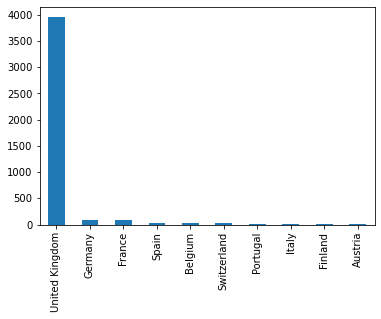

In [ ]:
# Plot the data
filtered_data.Country.value_counts()[:10].plot(kind='bar')

United Kingdom is the top country with the most distinct customers as well as recurring orders, followed by Germany and France.

In [ ]:
## Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [ ]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Quantity, since it is in negative as well as has very high max value while the 75th percentile is at 12. Unit Price also needs attention in this case. CustomerID should be changed to Integer

In [ ]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]
uk_data['CustomerID'] = uk_data['CustomerID'].astype(int)

In [ ]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  int32  
 7   Country      354345 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 23.0+ MB


In [ ]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [ ]:
# Calculate Total Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

##  Time frame of data

In [ ]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


Since InvoiceDate is an object datatype, the min function is not giving correct values for minimum and maximum dates. We need to convert it to date first.

## Performing RFM Analysis
- For Recency, Calculate the number of days between present date and date of last purchase for each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer

In [ ]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [ ]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [ ]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

Customers can have multiples invoices but an invoice has only one customer. Mutiple invoices mean a customer shopped frequently.

In [ ]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850,139.12
1,536366,2010-12-01 08:28:00,17850,22.20
2,536367,2010-12-01 08:34:00,13047,278.73
3,536368,2010-12-01 08:34:00,13047,70.05
4,536369,2010-12-01 08:35:00,13047,17.85


In [ ]:

rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [ ]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346,325,1,77183.60
12747,2,103,4196.01
12748,0,4596,33719.73
12749,3,199,4090.88
12820,3,59,942.34
...,...,...,...
18280,277,10,180.60
18281,180,7,80.82
18282,7,12,178.05


In [ ]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)

In [ ]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [ ]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346,325,1,77183
12747,2,103,4196
12748,0,4596,33719
12749,3,199,4090
12820,3,59,942


Column names are wrongly labeled.

In [ ]:
# Change the column names
rfm.columns=['recency','frequency','monetary']
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346,325,1,77183
12747,2,103,4196
12748,0,4596,33719
12749,3,199,4090
12820,3,59,942


##  Create Visuals
- Histogram for Recency Data
- Histogram for Frequency Data
- Histogram for Monetary Data


array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

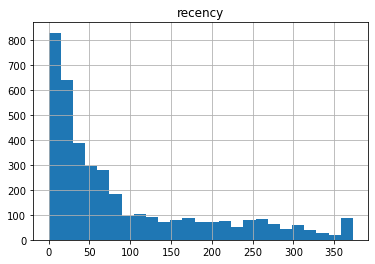

In [ ]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

In UK, lots of customers recently bought again within 100 days.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

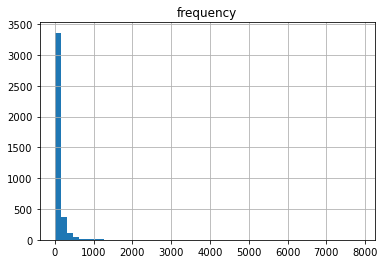

In [ ]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=50)

The total number of purchases i.e. frequency of prurchase was on the lower side in UK.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

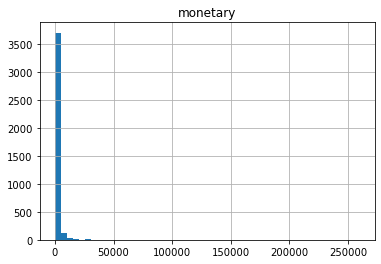

In [ ]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=50)

The purchases made in UK were all less than 50000, So we will narrow down our Monetary column to a lower value.

In [ ]:
rfm.sort_values(by=['monetary'], inplace=True)

In [ ]:
rfm = rfm[rfm.monetary <10000]

In [ ]:
rfm.tail(100)

,recency,frequency,monetary
CustomerID,,,
14049,16,488,5681
14110,3,156,5683
13468,1,302,5704
16553,163,84,5719
13178,26,265,5725
...,...,...,...
14733,16,202,9585
13458,7,382,9646
15078,7,440,9743


array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

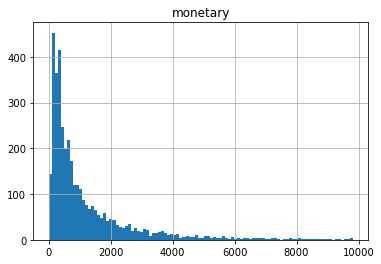

In [ ]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=100)

In terms of value of purchases, most of the purchases were of lower value i.e. less than 2000.

# Calculating Z scores to normalize the data

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[0.79548532 0.66779943 0.80336162]
 [2.04159154 0.66779943 0.80133672]
 [0.49473512 0.65921664 0.79931182]
 ...
 [0.86566036 3.10004395 5.77283257]
 [0.90576039 0.34496941 5.82278006]
 [0.89573538 2.23318249 5.82345502]]


In [ ]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

## Calcualting the RFM Score 

In [ ]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 182.0},
 'frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 55.0, 0.8: 115.0},
 'monetary': {0.2: 236.0, 0.4: 450.0, 0.6: 854.0, 0.8: 1822.0}}

In [ ]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [ ]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [ ]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

C:\Users\Owner\AppData\Local\Temp/ipykernel_6256/3071033863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
C:\Users\Owner\AppData\Local\Temp/ipykernel_6256/3071033863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
C:\Users\Owner\AppData\Local\Temp/ipykernel_6256/3071033863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

C:\Users\Owner\AppData\Local\Temp/ipykernel_6256/1662531255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)


,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
13256,14,1,0,5,1,1,511
16738,297,1,3,1,1,1,111
16454,44,2,6,3,1,1,311
14792,63,2,6,3,1,1,311
17956,249,1,12,1,1,1,111


In [ ]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

C:\Users\Owner\AppData\Local\Temp/ipykernel_6256/1017118094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
C:\Users\Owner\AppData\Local\Temp/ipykernel_6256/1017118094.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256,14,1,0,5,1,1,511,new customers
16738,297,1,3,1,1,1,111,at risk
16454,44,2,6,3,1,1,311,needs attention
14792,63,2,6,3,1,1,311,needs attention
17956,249,1,12,1,1,1,111,at risk


In [ ]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          77
new customers       147
needs attention     477
loyal customers     695
champions           989
at risk            1451
Name: Segment, dtype: int64

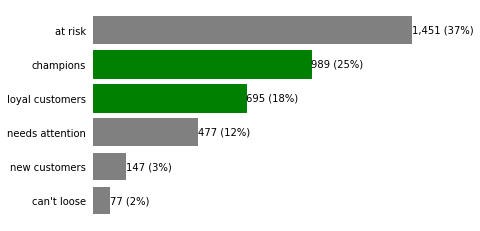

In [ ]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

A large chunk of customers i.e 37% in UK are at risk. While 12 % need attention beacuse they have high  recency score but a low frequency score.

Customers that have a high R F and M score are the best customers

In [ ]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001,4,339,9818,5,5,5,555,champions
13199,3,119,9817,5,5,5,555,champions
15078,7,440,9743,5,5,5,555,champions
13458,7,382,9646,5,5,5,555,champions
16523,1,290,9418,5,5,5,555,champions


Customers who have low recency score are likely to churn

In [ ]:
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093,275,159,7832,1,5,5,155,can't loose
17850,372,297,5391,1,5,5,155,can't loose
15032,256,52,4959,1,3,5,135,at risk
15808,306,208,3734,1,5,5,155,can't loose
17230,264,69,3638,1,4,5,145,at risk


Customers who have low recency, frequency and monetary scores are going to be lost

In [ ]:

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237,373,9,161,1,1,1,111,at risk
17643,373,8,101,1,1,1,111,at risk
15350,373,5,115,1,1,1,111,at risk
13747,373,1,79,1,1,1,111,at risk
15070,372,1,106,1,1,1,111,at risk


Customers with high frequency score are the loyal customers

In [ ]:
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001,4,339,9818,5,5,5,555,champions
13199,3,119,9817,5,5,5,555,champions
15078,7,440,9743,5,5,5,555,champions
13458,7,382,9646,5,5,5,555,champions
14733,16,202,9585,4,5,5,455,loyal customers


## Calculating RFM scores using 4 quintiles instead of 5 
- Making sure we give proper names to the segments. We will create 4 segments based on R and F scores instead of 6


In [ ]:
rfm2 = pd.read_csv('rfm.csv')
quintiles2 = rfm2[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75]).to_dict()

In [ ]:
def r_score2(x):
    if x <= quintiles2['recency'][.25]:
        return 4
    elif x <= quintiles2['recency'][.50]:
        return 3
    elif x <= quintiles2['recency'][.75]:
        return 2
    else:
        return 1
    
def fm_score2(x, c):
    if x <= quintiles2[c][.25]:
        return 1
    elif x <= quintiles2[c][.50]:
        return 2
    elif x <= quintiles2[c][.75]:
        return 3
    else:
        return 4

In [ ]:
rfm2['R'] = rfm2['recency'].apply(lambda x: r_score2(x))
rfm2['F'] = rfm2['frequency'].apply(lambda x: fm_score2(x, 'frequency'))
rfm2['M'] = rfm2['monetary'].apply(lambda x: fm_score2(x, 'monetary'))

In [ ]:
rfm2['RFM Score'] = rfm2['R'].map(str) + rfm2['F'].map(str) + rfm2['M'].map(str)
rfm2.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score
0,13256,14,1,0,4,1,1,411
1,16738,297,1,3,1,1,1,111
2,16454,44,2,6,3,1,1,311
3,14792,63,2,6,2,1,1,211
4,17956,249,1,12,1,1,1,111


In [ ]:
segments2 = {
    '[1-2][1-4]': 'at risk',
    '3[1-3]': 'needs attention',
    '[3-4][3-4]': 'loyal customers',
    '[3-4]1': 'new customers',
    
}

rfm2['Segment'] = rfm2['R'].map(str) + rfm2['F'].map(str)
rfm2['Segment'] = rfm2['Segment'].replace(segments2, regex=True)
rfm2.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,13256,14,1,0,4,1,1,411,new customers
1,16738,297,1,3,1,1,1,111,at risk
2,16454,44,2,6,3,1,1,311,needs attention
3,14792,63,2,6,2,1,1,211,at risk
4,17956,249,1,12,1,1,1,111,at risk


Customers that have a high R F and M score are the best customers


In [ ]:
rfm2[rfm2['RFM Score']=='444'].sort_values('monetary', ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
3835,13001,4,339,9818,4,4,4,444,loyal customers
3834,13199,3,119,9817,4,4,4,444,loyal customers
3833,15078,7,440,9743,4,4,4,444,loyal customers
3832,13458,7,382,9646,4,4,4,444,loyal customers
3831,14733,16,202,9585,4,4,4,444,loyal customers


Customers who have low recency score are likely to churn

In [ ]:
rfm2[rfm2['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
3805,13093,275,159,7832,1,4,4,144,at risk
3799,12980,157,20,7374,1,2,4,124,at risk
3739,16553,163,84,5719,1,3,4,134,at risk
3717,17850,372,297,5391,1,4,4,144,at risk
3692,15032,256,52,4959,1,3,4,134,at risk


Customers who have low recency, frequency and monetary scores are at risk of being lost

In [ ]:
rfm2[rfm2['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
441,14237,373,9,161,1,1,1,111,at risk
639,13065,373,14,205,1,1,1,111,at risk
154,17643,373,8,101,1,1,1,111,at risk
841,16048,373,8,256,1,1,1,111,at risk
97,13747,373,1,79,1,1,1,111,at risk


Customers with high frequency score are loyal

In [ ]:
rfm2[rfm2['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
3835,13001,4,339,9818,4,4,4,444,loyal customers
3834,13199,3,119,9817,4,4,4,444,loyal customers
3833,15078,7,440,9743,4,4,4,444,loyal customers
3832,13458,7,382,9646,4,4,4,444,loyal customers
3831,14733,16,202,9585,4,4,4,444,loyal customers
